Exploratory Data Analysis

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
import itertools
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
#reading the data
data = pd.read_excel('Superstore.xls')

In [3]:
#Analysing the data
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [6]:
#check for unique values
data.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            6144
Quantity           14
Discount           12
Profit           7545
dtype: int64

In [7]:
def print_unique_values(df, col):
    """"
    Print unique values in the specific column of the data
    """
    unique_values = df[col].unique()
    print(f"Unique values in {col} are: {unique_values}")
    for val in unique_values:
        print(f"{val} has {len(df[df[col] == val])} counts")

In [8]:
print_unique_values(data, 'Ship Mode')

Unique values in Ship Mode are: ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Second Class has 1945 counts
Standard Class has 5968 counts
First Class has 1538 counts
Same Day has 543 counts


In [9]:
print_unique_values(data, 'Segment')

Unique values in Segment are: ['Consumer' 'Corporate' 'Home Office']
Consumer has 5191 counts
Corporate has 3020 counts
Home Office has 1783 counts


In [10]:
print_unique_values(data, 'Region')

Unique values in Region are: ['South' 'West' 'Central' 'East']
South has 1620 counts
West has 3203 counts
Central has 2323 counts
East has 2848 counts


In [11]:
print_unique_values(data, 'Category')

Unique values in Category are: ['Furniture' 'Office Supplies' 'Technology']
Furniture has 2121 counts
Office Supplies has 6026 counts
Technology has 1847 counts


In [12]:
print_unique_values(data, 'Sub-Category')

Unique values in Sub-Category are: ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
Bookcases has 228 counts
Chairs has 617 counts
Labels has 364 counts
Tables has 319 counts
Storage has 846 counts
Furnishings has 957 counts
Art has 796 counts
Phones has 889 counts
Binders has 1523 counts
Appliances has 466 counts
Paper has 1370 counts
Accessories has 775 counts
Envelopes has 254 counts
Fasteners has 217 counts
Supplies has 190 counts
Machines has 115 counts
Copiers has 68 counts


In [13]:
#Chefcking missing values
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

There is no missing values in data

In [14]:
#statistical summary
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Row ID,9994.0,4997.5,1.0,2499.25,4997.5,7495.75,9994.0,2885.163629
Order Date,9994,2016-04-30 00:07:12.259355648,2014-01-03 00:00:00,2015-05-23 00:00:00,2016-06-26 00:00:00,2017-05-14 00:00:00,2017-12-30 00:00:00,NaN
Ship Date,9994,2016-05-03 23:06:58.571142912,2014-01-07 00:00:00,2015-05-27 00:00:00,2016-06-29 00:00:00,2017-05-18 00:00:00,2018-01-05 00:00:00,NaN
Postal Code,9994.0,55190.379428,1040.0,23223.0,56430.5,90008.0,99301.0,32063.69335
Sales,9994.0,229.858001,0.444,17.28,54.49,209.94,22638.48,623.245101
Quantity,9994.0,3.789574,1.0,2.0,3.0,5.0,14.0,2.22511
Discount,9994.0,0.156203,0.0,0.0,0.2,0.2,0.8,0.206452
Profit,9994.0,28.656896,-6599.978,1.72875,8.6665,29.364,8399.976,234.260108


There are several categories in the Superstore sales data, we start from time series analysis and forecasting for furniture sales.

In [15]:
furniture = data.loc[data['Category'] == 'Furniture']

In [16]:
#check min and max time stamp
furniture['Order Date'].min(), furniture['Order Date'].max()


(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

we  have good 4-year furniture sales data

In [17]:
furniture.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [18]:
#Removing columns that we don't need for the time series analysis
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

There is no missing values in furnitur data

In [19]:
furniture.head(3)

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940


In [20]:
#Aggregate the sales by order date
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [21]:
furniture.head(3)

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940


In [22]:
#indexing with time series data
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [23]:
#use average daily sales value for that month instead, and we are using the start of each month as the timestamp.
X = furniture['Sales'].resample('MS').mean()

In [24]:
X['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

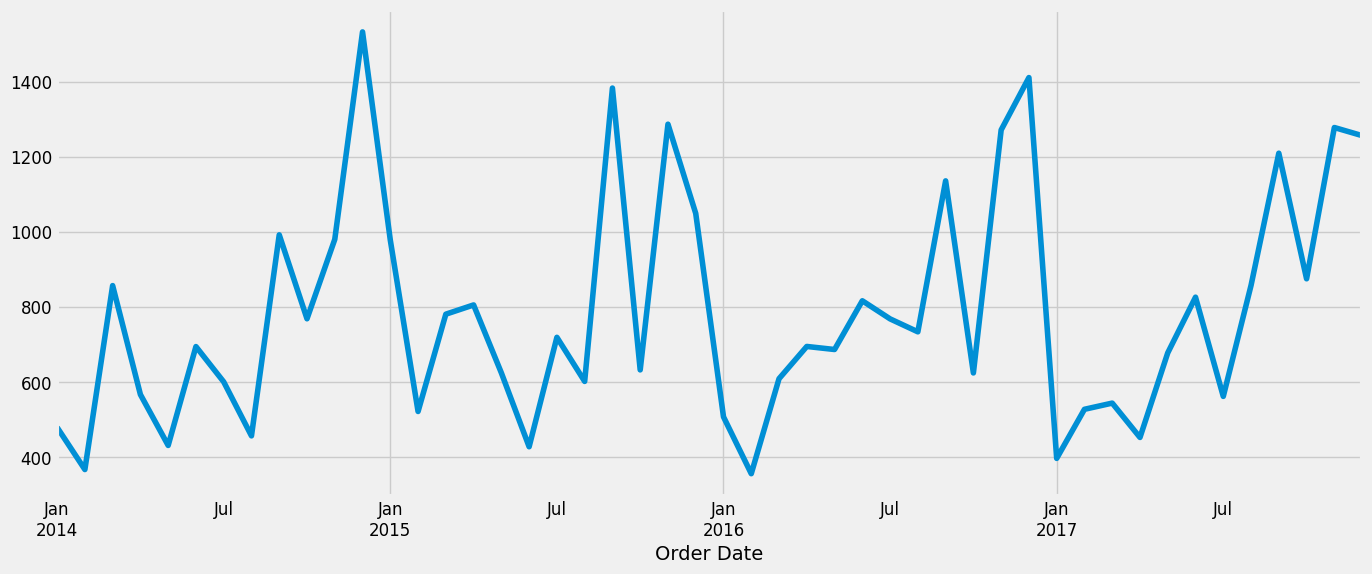

In [25]:
#visualizing the data
X.plot(figsize=(15, 6))
plt.show()

The time-series has seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year.

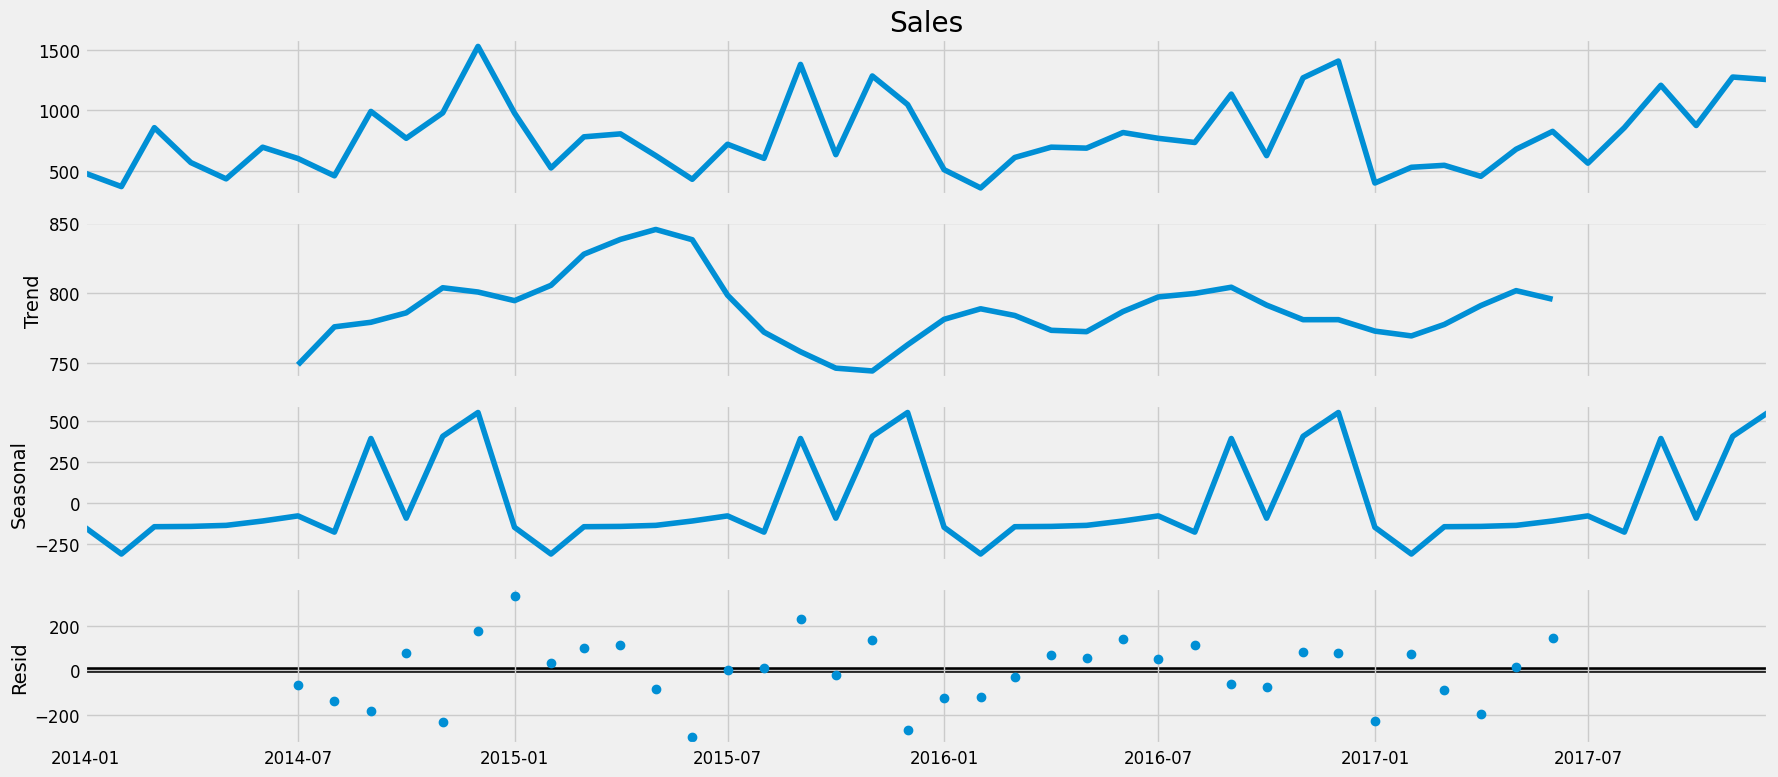

In [26]:
#Decomposition of the time series data
#Decomposition is a statistical task that deconstructs a time series into several components, each representing one of the underlying categories of patterns. such as trend, seasonality, and noise.
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(X, model='additive')
fig = decomposition.plot()
plt.show()

This plot above clearly shows that the sales of furniture is unstable, along with its obvious seasonality

Time Series Forecasting with ARIMA (Auto Regressive Integrated Moving Average)

In [27]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [28]:
#Parameter selection for our furniture’s sales ARIMA Time Series Model
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(X,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1430.5940158227277
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130919703
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.27028997937964
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418338


C:\Users\Sivakumar.R\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Sivakumar.R\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1158.2740510743417
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.24882803026037
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758114
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2697.141968528642
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.56074298091517


C:\Users\Sivakumar.R\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Sivakumar.R\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Sivakumar.R\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.6261389673273
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.5487551793319
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2463.2940581543344
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.98848769468685
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.87255764834936
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.8947668259312
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1264.4207196739255
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.6378567269187
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:304.96712281679606
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.7889663004408
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1414.5134153732486
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109212


C:\Users\Sivakumar.R\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Sivakumar.R\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:306.911320015142
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.9056176817322
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1862.285118400127
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.87055484828977
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:279.58062316807013


C:\Users\Sivakumar.R\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Sivakumar.R\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.18329774425706
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2196.6816905746578
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.75743684174415
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:281.5576621461241
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067712
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1441.6982299153735
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.4632147852136
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:304.20776751609407


C:\Users\Sivakumar.R\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Sivakumar.R\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.92593679352063
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1070.1773960671685
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.46646750846025
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:304.5842692143862
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.7794442186147
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2661.0206568163258
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.3685195814106
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:293.3422193965918
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.5763323876896


C:\Users\Sivakumar.R\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Sivakumar.R\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2395.3920247404626
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.01560021225833
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:293.7513188124911
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541902
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1255.4874847016476
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.2003422281136
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:300.2130611619101
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.34036587841325
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1139.903606727971


C:\Users\Sivakumar.R\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Sivakumar.R\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.62709013454014
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:302.326499251175
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:649.0318019835039
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:257.66615556073845
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:460.47626876101845


C:\Users\Sivakumar.R\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:281.3873006939402
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:469.52503546607676
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1399.2890668282967
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:297.78754395313763


C:\Users\Sivakumar.R\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:283.3661017477948


In [29]:
#fitting the ARIMA model
# Define p, d, q as integers
p = 1  # AR term
d = 1  # Differencing term
q = 1  # MA term

# Fitting the ARIMA model
if len(X) > max(p, d, q):
    order = (p, d, q)
    seasonal_order = (1, 1, 0, 12)
    mod = sm.tsa.statespace.SARIMAX(X,
                                    order=order,
                                    seasonal_order=seasonal_order,
                                    enforce_invertibility=False)
    results = mod.fit()
    print(results.summary().tables[1])
else:
    print("The length of the time series data is too short for the specified ARIMA model parameters.")

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0676      0.226      0.299      0.765      -0.376       0.511
ma.L1         -1.0000      0.279     -3.590      0.000      -1.546      -0.454
ar.S.L12      -0.4807      0.147     -3.260      0.001      -0.770      -0.192
sigma2      4.108e+04   6.78e-06   6.06e+09      0.000    4.11e+04    4.11e+04


#1.The AR(1) term is not significant (p-value > 0.05), suggesting that the first lag of the autoregressive term does not contribute much to the model.
/n
#2. Interpretation: The MA(1) term is significant (p-value < 0.05), indicating that the first lag of the moving average term is important in the model.
/n
#3. Interpretation: The seasonal AR(12) term is not significant (p-value > 0.05), suggesting that the seasonal autoregressive term does not contribute much to the model.
/n
#4. Interpretation: The variance of the residuals is significant, indicating that the model has captured some of the variability in the data.

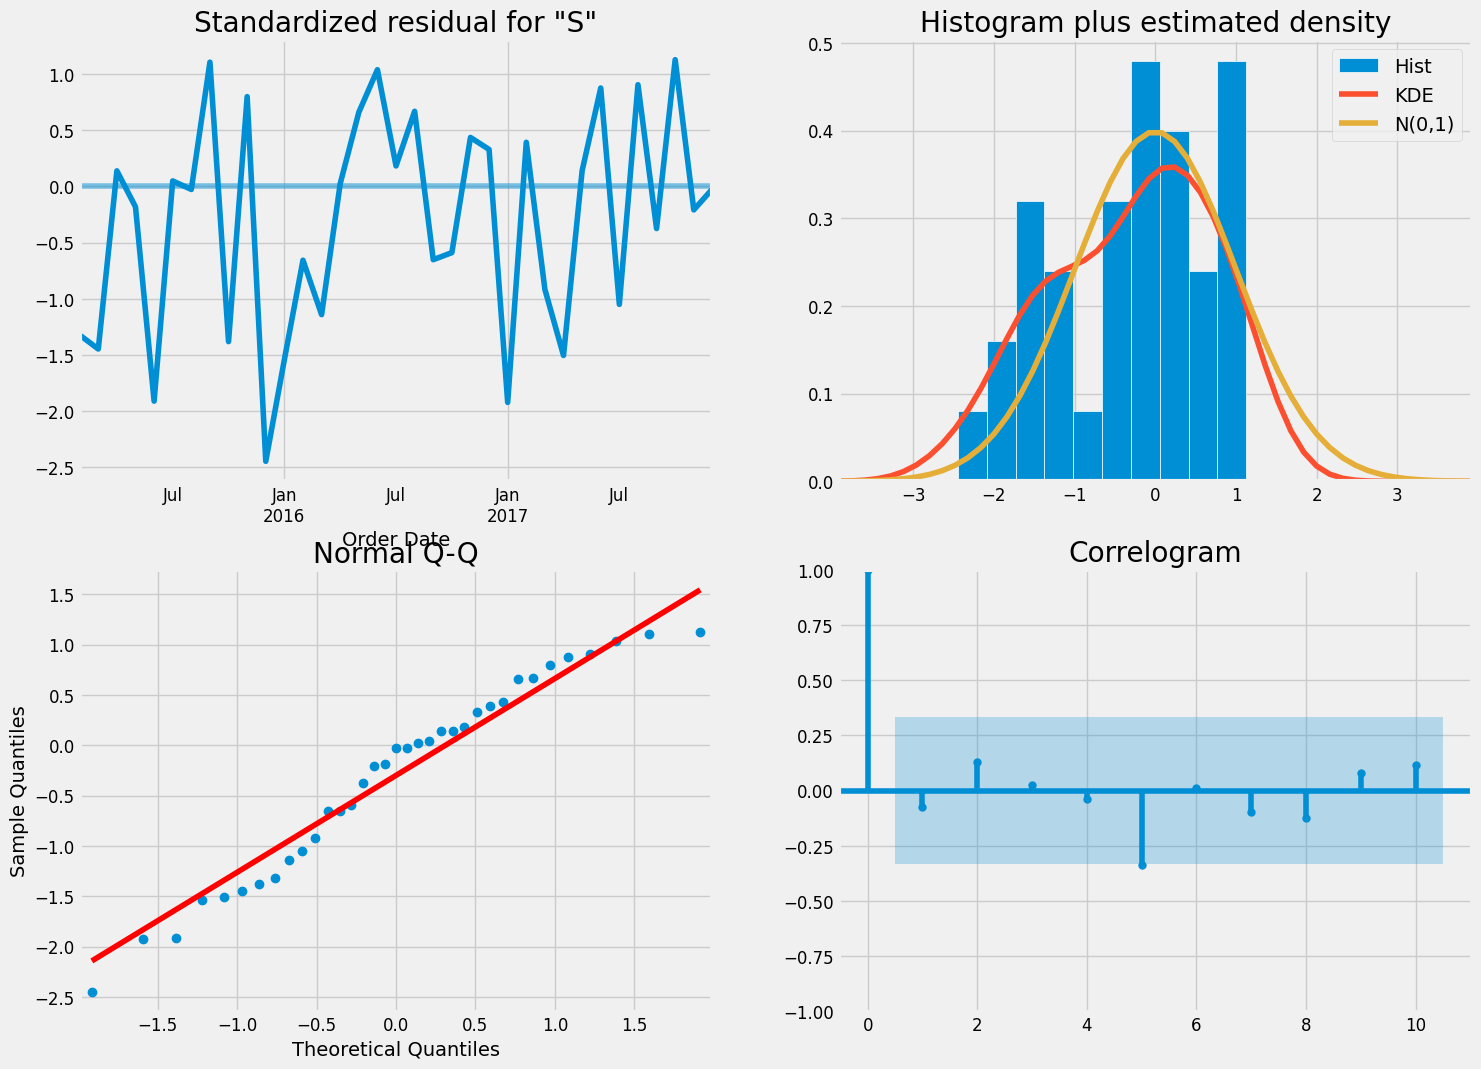

In [30]:
results.plot_diagnostics(figsize=(16, 12))
plt.show()

It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed.

Validating forecasts
To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017–01–01 to the end of the data.

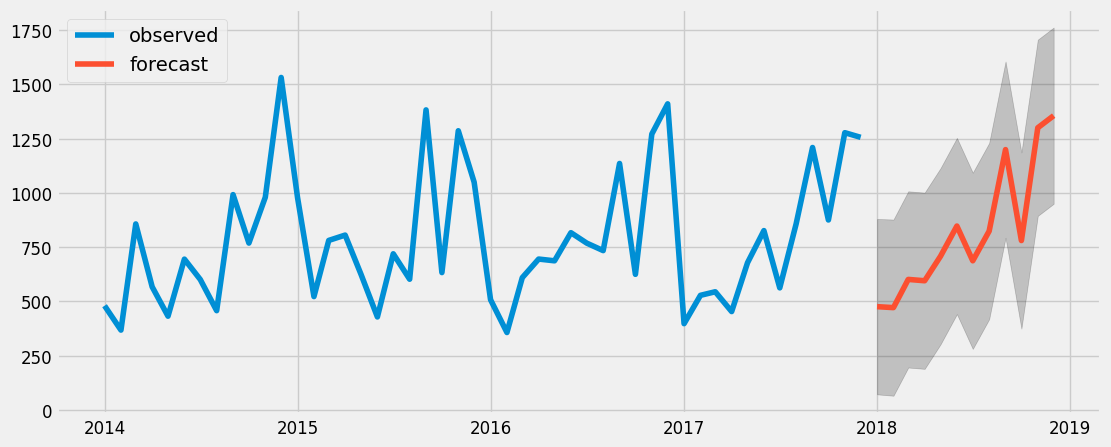

In [31]:
forecast = results.get_forecast(steps=12)
forecast_ci = forecast.conf_int()
plt.figure(figsize=(12, 5))
plt.plot(X, label='observed')
plt.plot(forecast.predicted_mean, label='forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=0.2)
plt.legend()
plt.show()

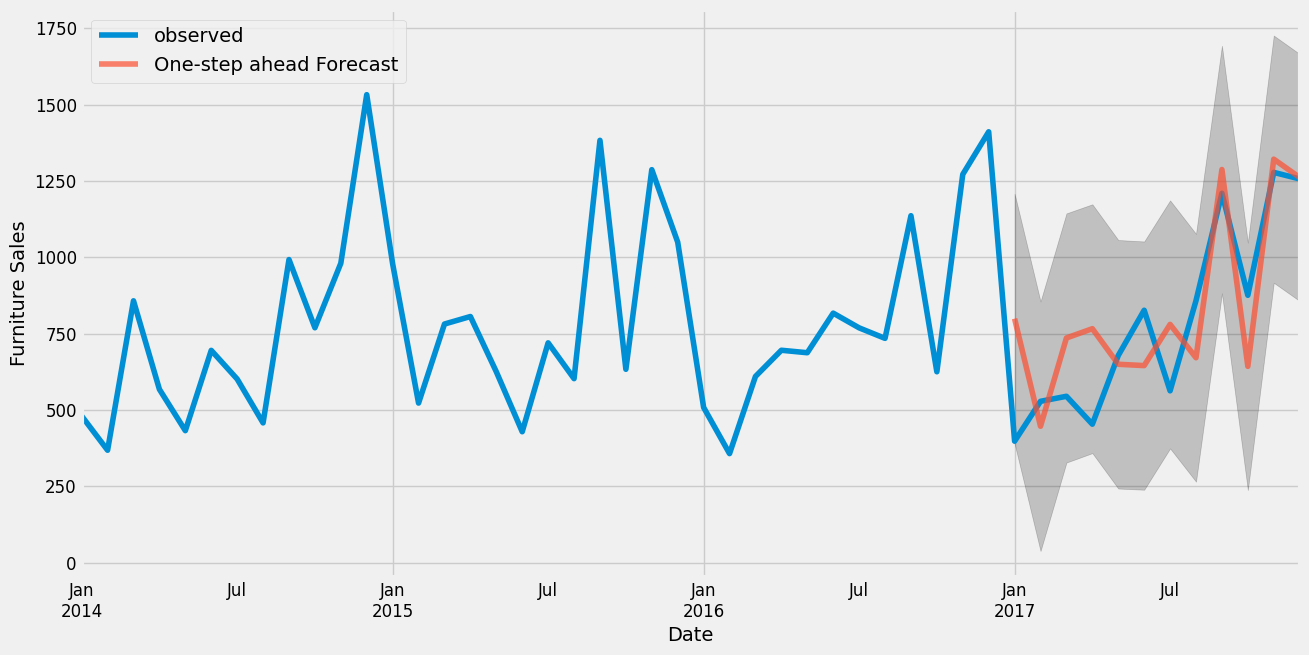

In [32]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = X['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

In [33]:
X_forecasted = pred.predicted_mean
X_truth = X['2017-01-01':]
mse = ((X_forecasted - X_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 39996.01


In [34]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 199.99


Producing and Visualizing forecast

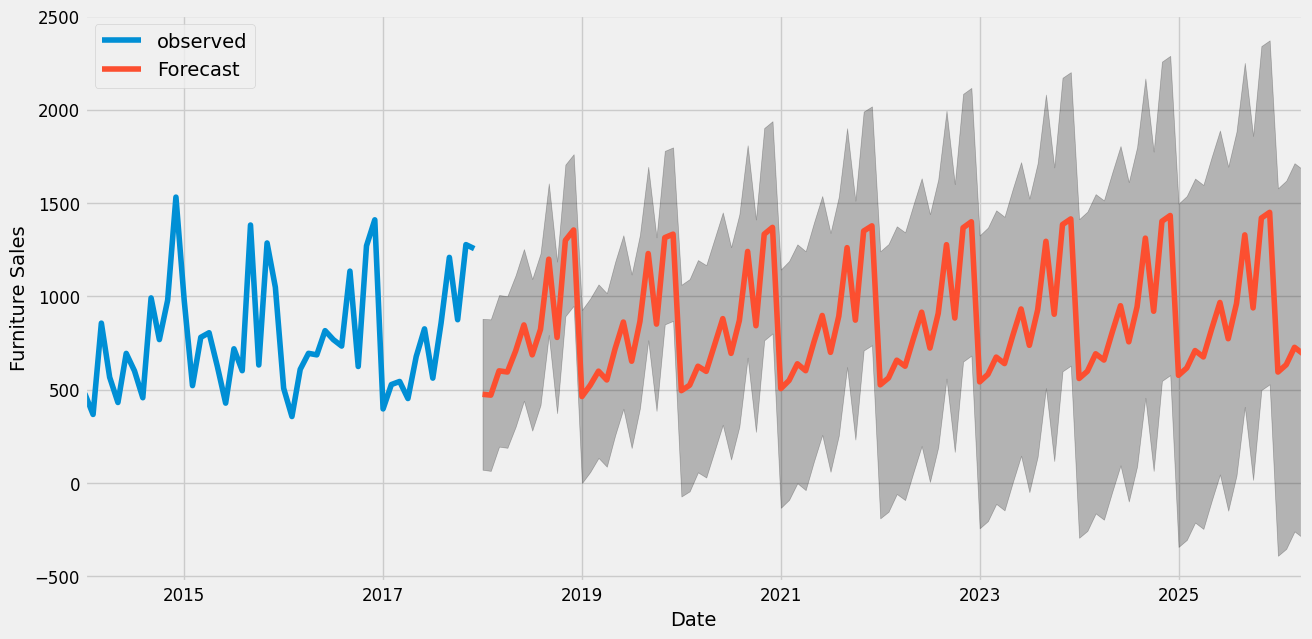

In [35]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = X.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()


model clearly captured furniture sales seasonality.